# **KNN(k近傍法，k-nearest neighbor)** 
特徴空間における最も近い訓練例に基づいた分類の手法であり、パターン認識でよく使われる。最近傍探索問題の一つ。k近傍法は、インスタンスに基づく学習の一種であり、怠惰学習（lazy learning） の一種である。その関数は局所的な近似に過ぎず、全ての計算は分類時まで後回しにされる。また、回帰分析にも使われる。（Wikipedia）

## **データの準備（iris-dataset）**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, index=iris.target, columns=iris.feature_names)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)
iris.data.shape

(150, 4)

## **①sklearn** 

In [2]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(f"accuracy_score:{knn.score(X_test, y_test)}")

accuracy_score:0.9777777777777777


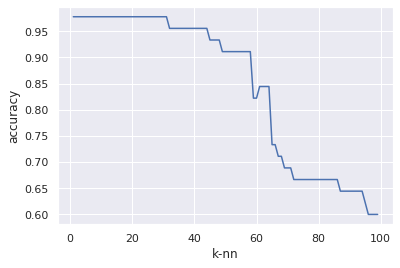

In [4]:
# kの値によるaccuracyの変化

import matplotlib.pyplot as plt
import seaborn as sns

accuracy_list = []
sns.set()

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_list.append(accuracy_score(y_test, knn.predict(X_test)))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(range(1, 100), accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()

## **②スクラッチ**

In [5]:
from collections import Counter

def knn(k, X_train, X_text, y_train, y_test):
    prediction = []
    
    for test in X_test:
        
        # すべてのtrainとtestとの距離を計算したリストを作る
        distances = [np.linalg.norm(train - test) for train in X_train]

        # distancesの値が小さい順に並べた、trainのindexのリストを作る
        sorted_train_indexes = np.argsort(distances)
        
        # testから近いk個のtrainのラベルを取り出す
        sorted_k_labels = y_train[sorted_train_indexes][:k]
        
        # 最も数の多かったlabelを取り出す
        pred = Counter(sorted_k_labels).most_common(1)[0][0]
        prediction.append(pred)

    return prediction

prediction = knn(5, X_train, X_test, y_train, y_test)
print(f"accuracy_score:{accuracy_score(y_test, prediction)}")

accuracy_score:0.9777777777777777
